## Reducing dimensionality and clustering

In [3]:
import os
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

### Load and process 2D arrays

In [4]:
# Define the folder containing the CSV files
input_folder = '../output/raw'

# Load all CSV files into a list of 2D arrays
arrays = []
for filename in os.listdir(input_folder):
    if filename.endswith('.csv'):
        if 'S1' in filename:
            filepath = os.path.join(input_folder, filename)
            array = np.loadtxt(filepath, delimiter=',')
            arrays.append(array)

### Flatten and reduce dimensionality

In [5]:
# Flatten each 2D array into a 1D array
flattened_arrays = [array.flatten() for array in arrays]

# Reduce dimensionality using PCA
pca = PCA(n_components=10)  # Adjust the number of components as needed
reduced_data = pca.fit_transform(flattened_arrays)

In [6]:
reduced_data[0]

array([ 0.40871969, -0.87010226,  0.75068961,  0.37571234,  0.74294366,
        1.08457708, -0.78939603,  0.50643576,  0.51022583, -0.07578998])

### Dimensionality reduction with TSNE

<class 'numpy.ndarray'>
<class 'list'>


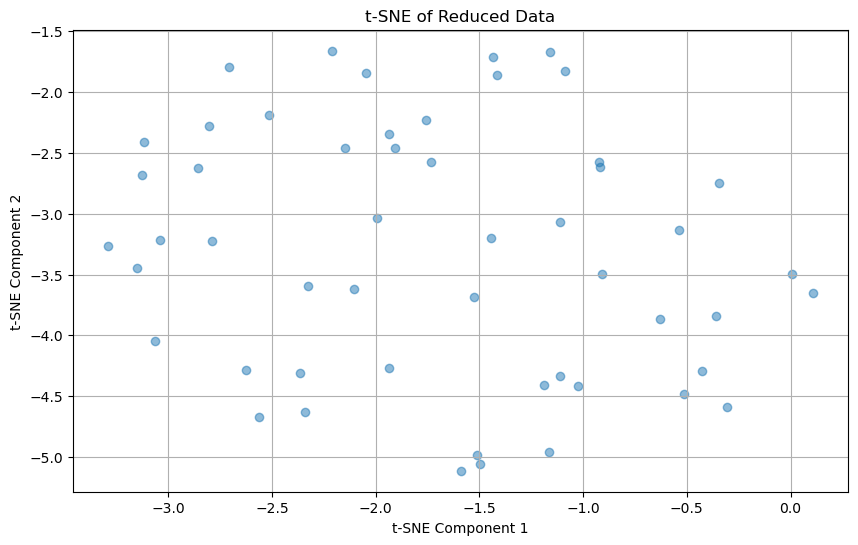

In [12]:
# Reduce dimensionality using TSNE
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
flattened_ndarray = np.array(flattened_arrays)
reduced_data_tsne = tsne.fit_transform(flattened_ndarray)
# Plot the reduced data
plt.figure(figsize=(10, 6))
plt.scatter(reduced_data_tsne[:, 0], reduced_data_tsne[:, 1], alpha=0.5)
plt.title('t-SNE of Reduced Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid()
plt.show()

c:\Users\aless\anaconda3\envs\MNEdemo\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


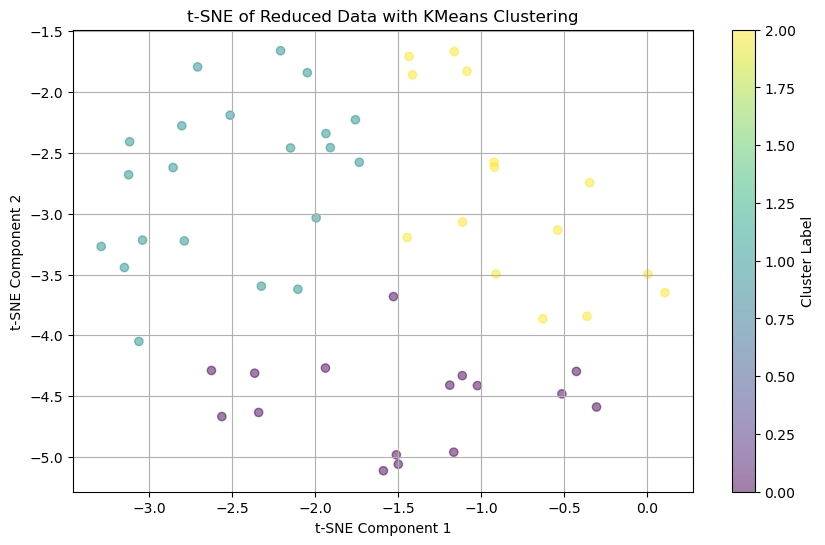

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(reduced_data_tsne)
# Plot the clustered data
plt.figure(figsize=(10, 6))
plt.scatter(reduced_data_tsne[:, 0], reduced_data_tsne[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.title('t-SNE of Reduced Data with KMeans Clustering')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

### Perform k-means clustering

In [39]:
# Perform k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(reduced_data)

c:\Users\aless\anaconda3\envs\MNEdemo\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


### Visualize the clustering results

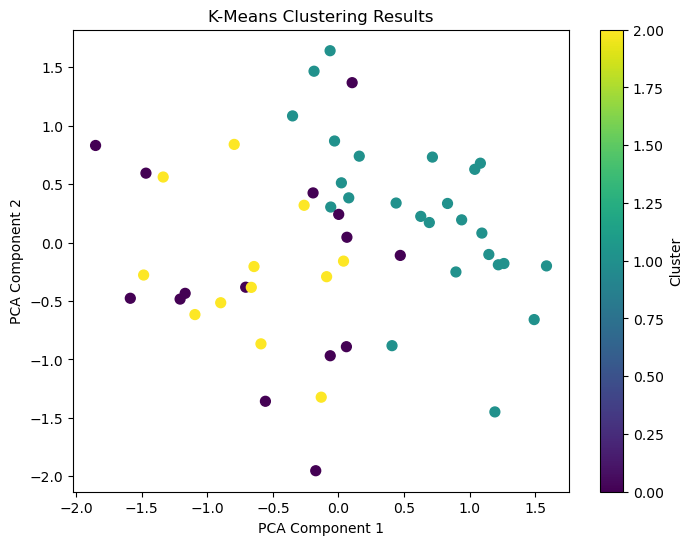

In [40]:
# Visualize the clustering results (using the first two PCA components)
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap='viridis', s=50)
plt.colorbar(label='Cluster')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering Results')
plt.show()

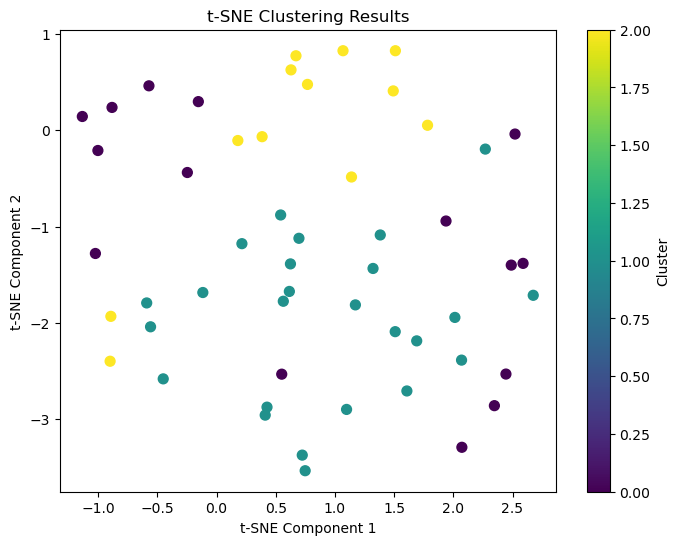

In [41]:
from sklearn.manifold import TSNE

# Reduce dimensionality using t-SNE
tsne = TSNE(n_components=2, random_state=42)
reduced_data_tsne = tsne.fit_transform(reduced_data)
# Plot the t-SNE results
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data_tsne[:, 0], reduced_data_tsne[:, 1], c=clusters, cmap='viridis', s=50)
plt.colorbar(label='Cluster')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Clustering Results')
plt.show()